# Problem Statement :- To build a predictive model and find out the sales of each product at a particular store
Total Number of Store- 1559
Total Number of Cities- 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

Loading first data file into a dataFrame i.e Test1

In [2]:
df=pd.read_csv('Train1.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Observation-  Total Number of rows- 8523
Total Number of Column-12

In [4]:
df.shape

(8523, 12)

Checking the dimension of the dataset

In [5]:
df.ndim

2

Checking the columns of the dataset

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

checking for minimum and maximum values

In [7]:
df.min()

Item_Identifier                      DRA12
Item_Weight                          4.555
Item_Fat_Content                        LF
Item_Visibility                        0.0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object

Observation-  Lowest 'Item_outlet_sale' is 33.29 

In [8]:
df.max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                           reg
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object

Observation- Highest 'Item_outlet_sale' is 13086.9648

Checking for top 5 and bottom 5 sample from the dataset

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


checking all the basic information of the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observation- Total number of rows= 8523 out of which 'Item_Weight'have some missing values, 'outlet_size' have some missing values.

We can also see the data types of each columns which is exactly the same as given in dataset. (sometime float values can be treated as object due to some special character present in the column) that's not a case in this data set.

In [12]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Observation- It is a series with the count of unique values for each columns

Now checking for all rhe null values present in the dataset

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observation- We can notice that the null values are present in 'Item Weight' & 'Outlet_size' columns which will directly impact the decision making of the dataset. It is important to remove or replace the null values. Still reconfirming the position of null values in the given dataset with the help of "heatmap"

<AxesSubplot:>

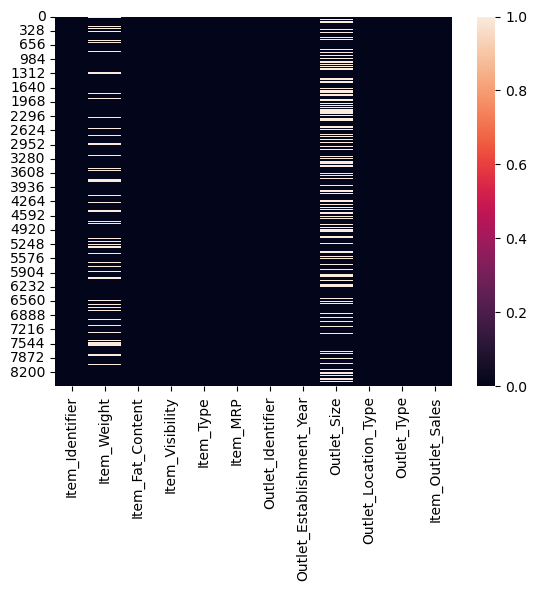

In [14]:
sns.heatmap(df.isnull())

Observation- As mentioned earlier, we can observe the position of all the null values in the column name 'Outlet_size' & 'Item_weight'. This is common impression that occurs when user wantedly or unwantedly do not fill the input in the column. this directly or indirectly hampers the prediction hence we need to replace this with the mean of the column or remove the null values to get the best predictive analysis. The heatmap shows the exact position of the null values present in the column. We can notice from earlier observations that the column name 'Item_Weight',' Outlet_Size' containing 1413 & 2410 null values. 

Checking How many type of Outlet is present in the given dataset, which is mentioned in column 'Outlet_type'

In [15]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Seeing this more clearly with the help of vizualization methods 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

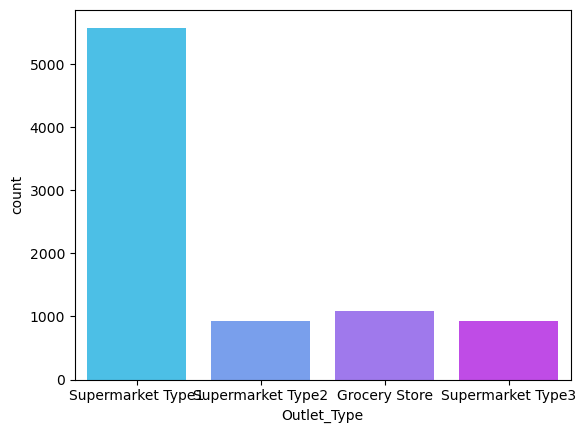

In [16]:
print(df['Outlet_Type'].value_counts())
sns.countplot(df['Outlet_Type'],palette="cool")

Observation- We can see more clearly that number of super market type1 is on higher side i.e 5577 rest all are almost equivalant i.e 1083,935 & 938 respectively. Hence we can note that the number of type1_supermarket is more in all the cities. This can be a impactful insight from the given dataset

After observing the Outlet_Type other important factor is oulet_size. Again seeing the count of big and small outlets respectively

In [17]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Observation- We can see that the Medium_sized outlets are of the higher side as compare to small and high where as high outlet_size are very less in compare to medium and small.Keeping in mind this also contains NULL values hence the projectory is not clear yet

Seeing this more clearly with the help of data visualization 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

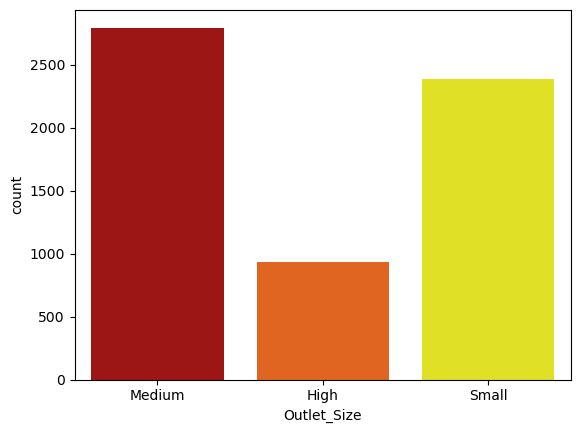

In [18]:
print(df['Outlet_Size'].value_counts())
sns.countplot(df['Outlet_Size'],palette="hot")

We have 2 observations with us we can conclude that we have medium_sized supermarkets more that small and high size supermarket. A Hypothesis says that products are mostly sold in medium_sized outlet_types as compared to high and small sized outlets. First we will see the number of products sold in this outlets and will conclude afterwards that do we need more number of small, medium & high sized outlets in the city. 

Similarly, we can see the number of Item_Types present with us so it will be more easy to evaluate the sales 

In [19]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Observation- BigMart is majorly selling items like Fruits & vegetables, snack food household etc. 

observing this more closely with the help of data visualization so that we can clearly show the count of iten_type 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

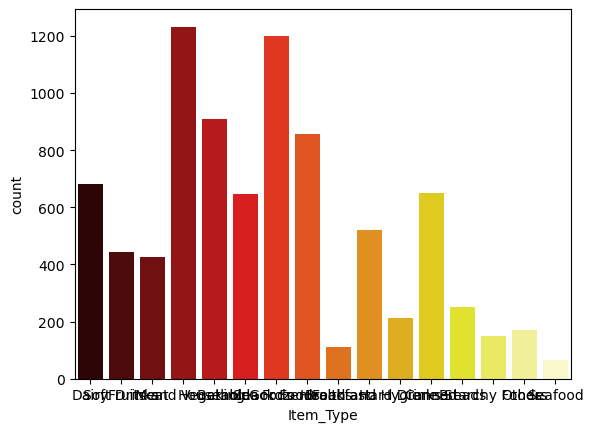

In [20]:
print(df['Item_Type'].value_counts())
sns.countplot(df['Item_Type'],palette="hot")

Observation- The graph shows the count of item_type sold by Bigmart in 10 cites and 1559 products contains of this items majorly it is selling fruits & vegetables

In [21]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

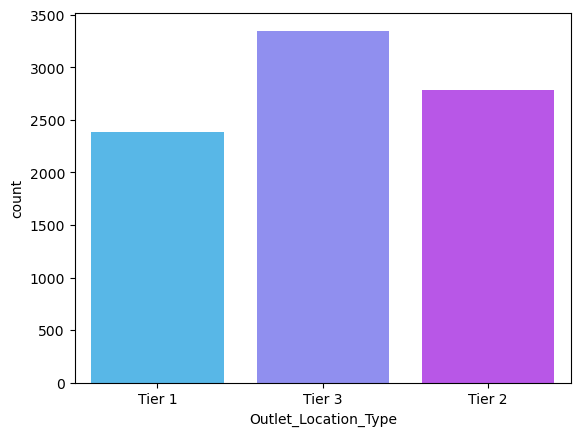

In [22]:
print(df['Outlet_Location_Type'].value_counts())
sns.countplot(df['Outlet_Location_Type'],palette="cool")

Note- Machines are not able to read the human language hence converting some objects into numeric value using Encoding techniques. 

So there are 2 wncoding techniques a) One Hot Encoder b) Label Encoder

a)One hot Encoder is used when the column have only 2 values i.e Male/Female, Positive/Negative 
b)Label Encoder is used when the column have more than 2 repeated values 

Applying Label Encoding on the exisiting Dataset 

In [23]:
from sklearn.preprocessing import LabelEncoder 

In [24]:
le=LabelEncoder()

First converting 'Item_Fat_Content' into machine language using label encoder 

In [25]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [26]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

Outlet_size contains some null values hence removing the null values from the dataset first

There are more number of null value present in dataset hence, Insted of removing the null values we will replace null values with the mean in 'Item_Weight' column.

Also, we will use Simple Imputer in Outlet_Size in which we will replace null value by most frequently used values 

Initializing first for 'Item_Weight'

In [27]:
df['Item_Weight']=df['Item_Weight'].fillna((df['Item_Weight'].median()))

In [28]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Verifing null values again for 'Item_Weight'

In [29]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observation- Null Values are successfully replaced by median in 'Item_Weight' column

Now considering Outlet_size 

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imp=SimpleImputer(strategy="most_frequent")

In [32]:
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Observation- Successfully removed all the null values from the given dataset.

In [34]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Now, Applying Label Encoding technique on the remaining column i.e Outlet_size,outlet_location_Type,Oulet_Type

In [35]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [36]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [37]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [38]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [39]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

We can also use label encoder for Outlet_Identifier 

In [40]:
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [41]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Now, Observing the description of the given dataset using describe() function from that we will come to know how align is the dataset and what all measures we need to take to align the dataset 

In [42]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.22724,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.55500,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.31000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.60000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.00000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.35000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Observation-Standard Deviation is high in "Item_MRP" hence there is the possibilities of Outliers in this columns, the range is bit high

mean & median are ok, hence there is less possibilities of skewness in the dataset.

There is a high difference in 75% and max value hence there is a possibility of outliers in "Item_MRP".

Now, seeing the correlation in the data, correlation is a crusial factor in any dataset as it shows how the data is correleated with each other in the dataset, this tells us what is affecting out target variable i.e sales the most and which column is to be taken under consideration and which not. 

Observing the correlation of the data below

In [43]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017255,-0.014168,0.028038,0.024951,-0.007666,0.007739,-0.010536,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.017255,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.014168,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028038,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024951,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007666,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,0.007739,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.010536,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.001958,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.009973,-0.004214,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.201483,0.467219,1.000000,0.401522


Seeing the correlation with the help of data visualization technique

<AxesSubplot:>

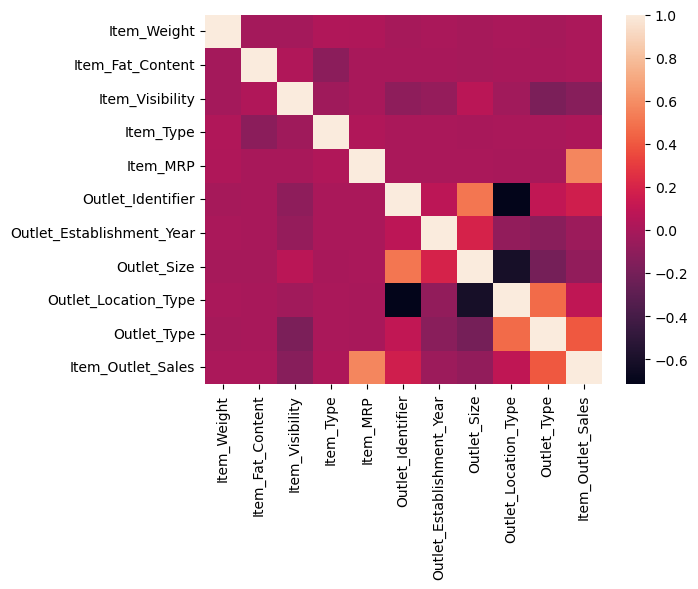

In [44]:
sns.heatmap(dfcor)

Observation- We can observe that Outlet_Type is highly correleated with Item_Outlet_Sales moreover Outlet_Location_Type is also correleated with Item_Outlet_Sales Outlet_Size is also bit correleated, for more clearty we will put the actual numbers inside the heatmap.

Putting the values inside the heatmap for more clear observations

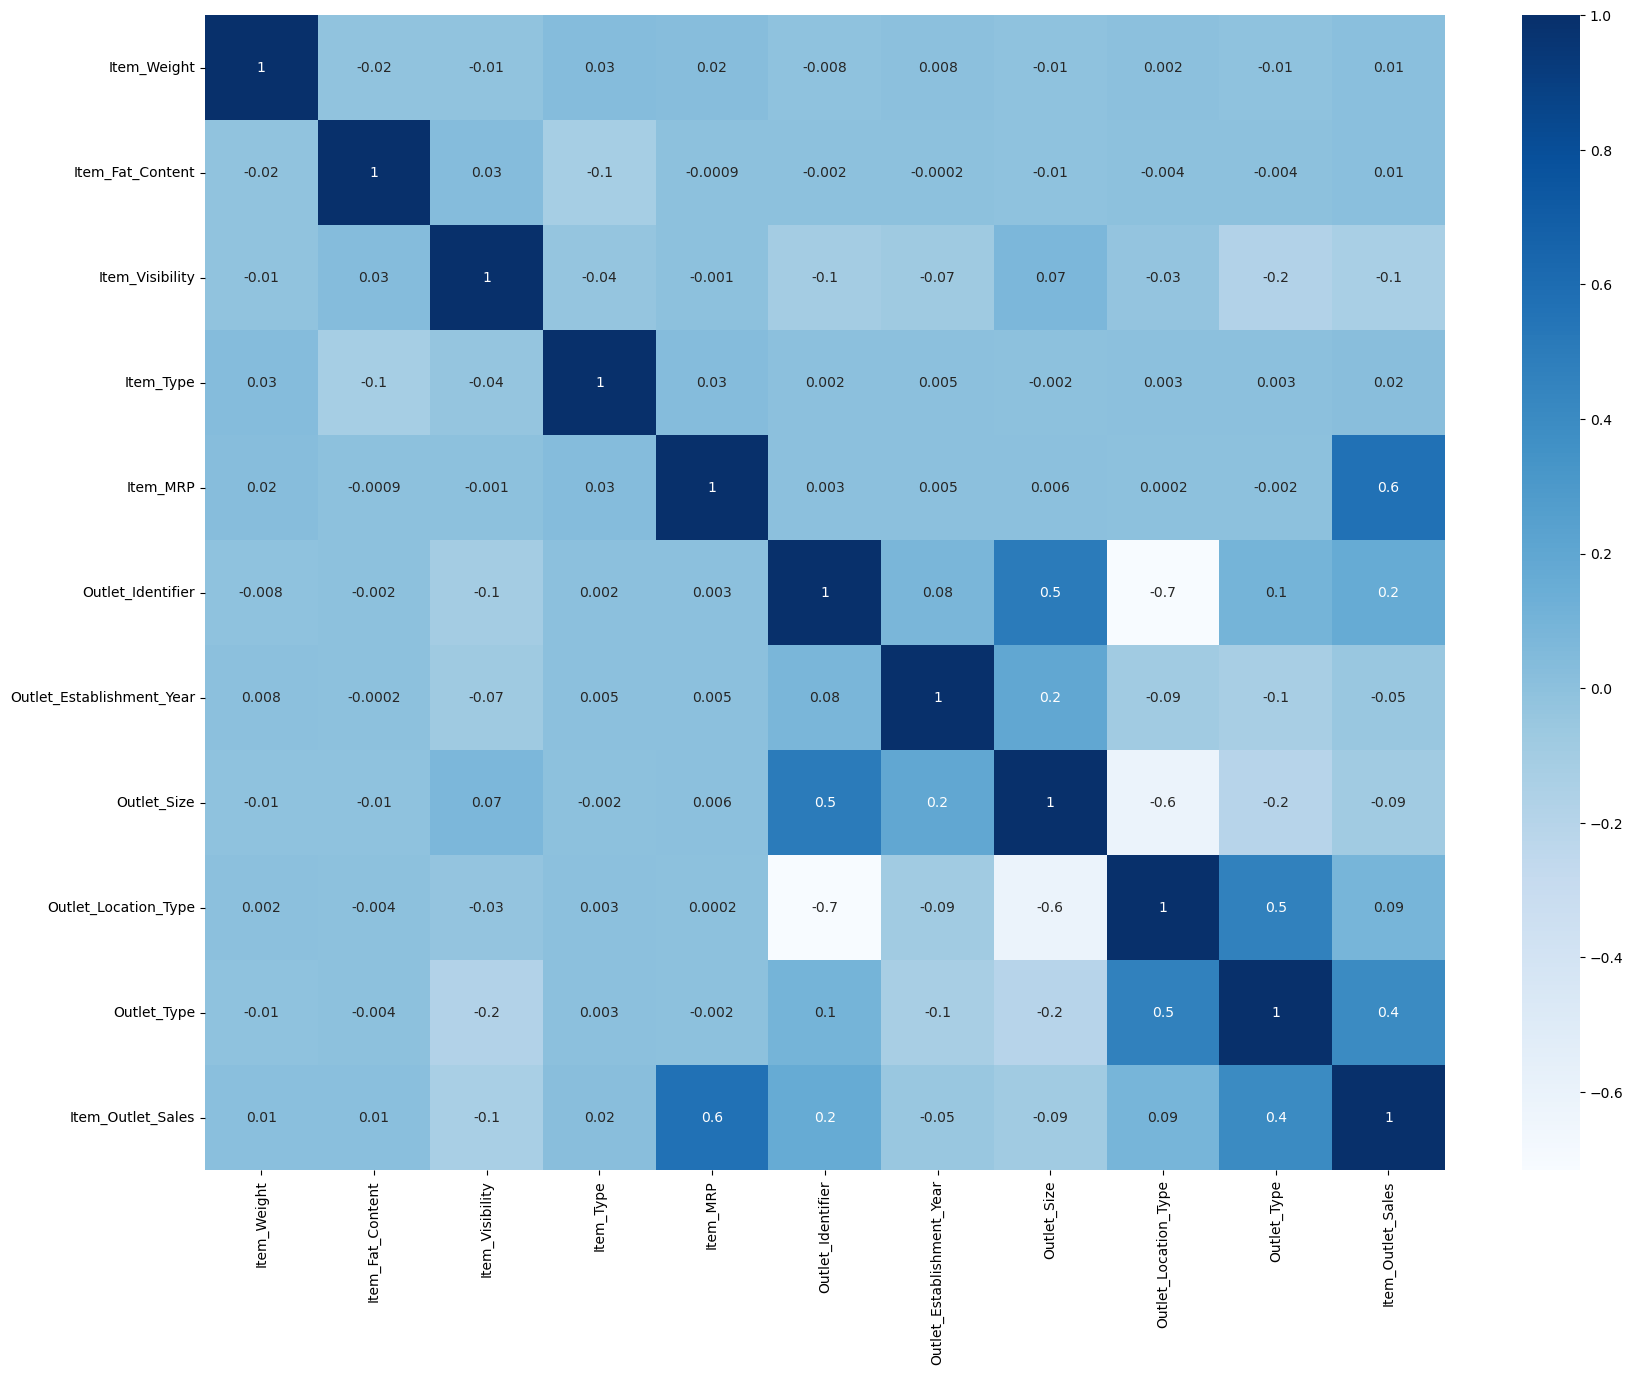

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',fmt=".1g",annot=True)
plt.yticks(rotation=0);
plt.show()

Observation- Here we can see which all are the elements which are correlated with sales of the products 

For more clear observation we can see the clean comparision between the factors which are related to the sale of the products by using the Bargraph Formate(to see correlation)

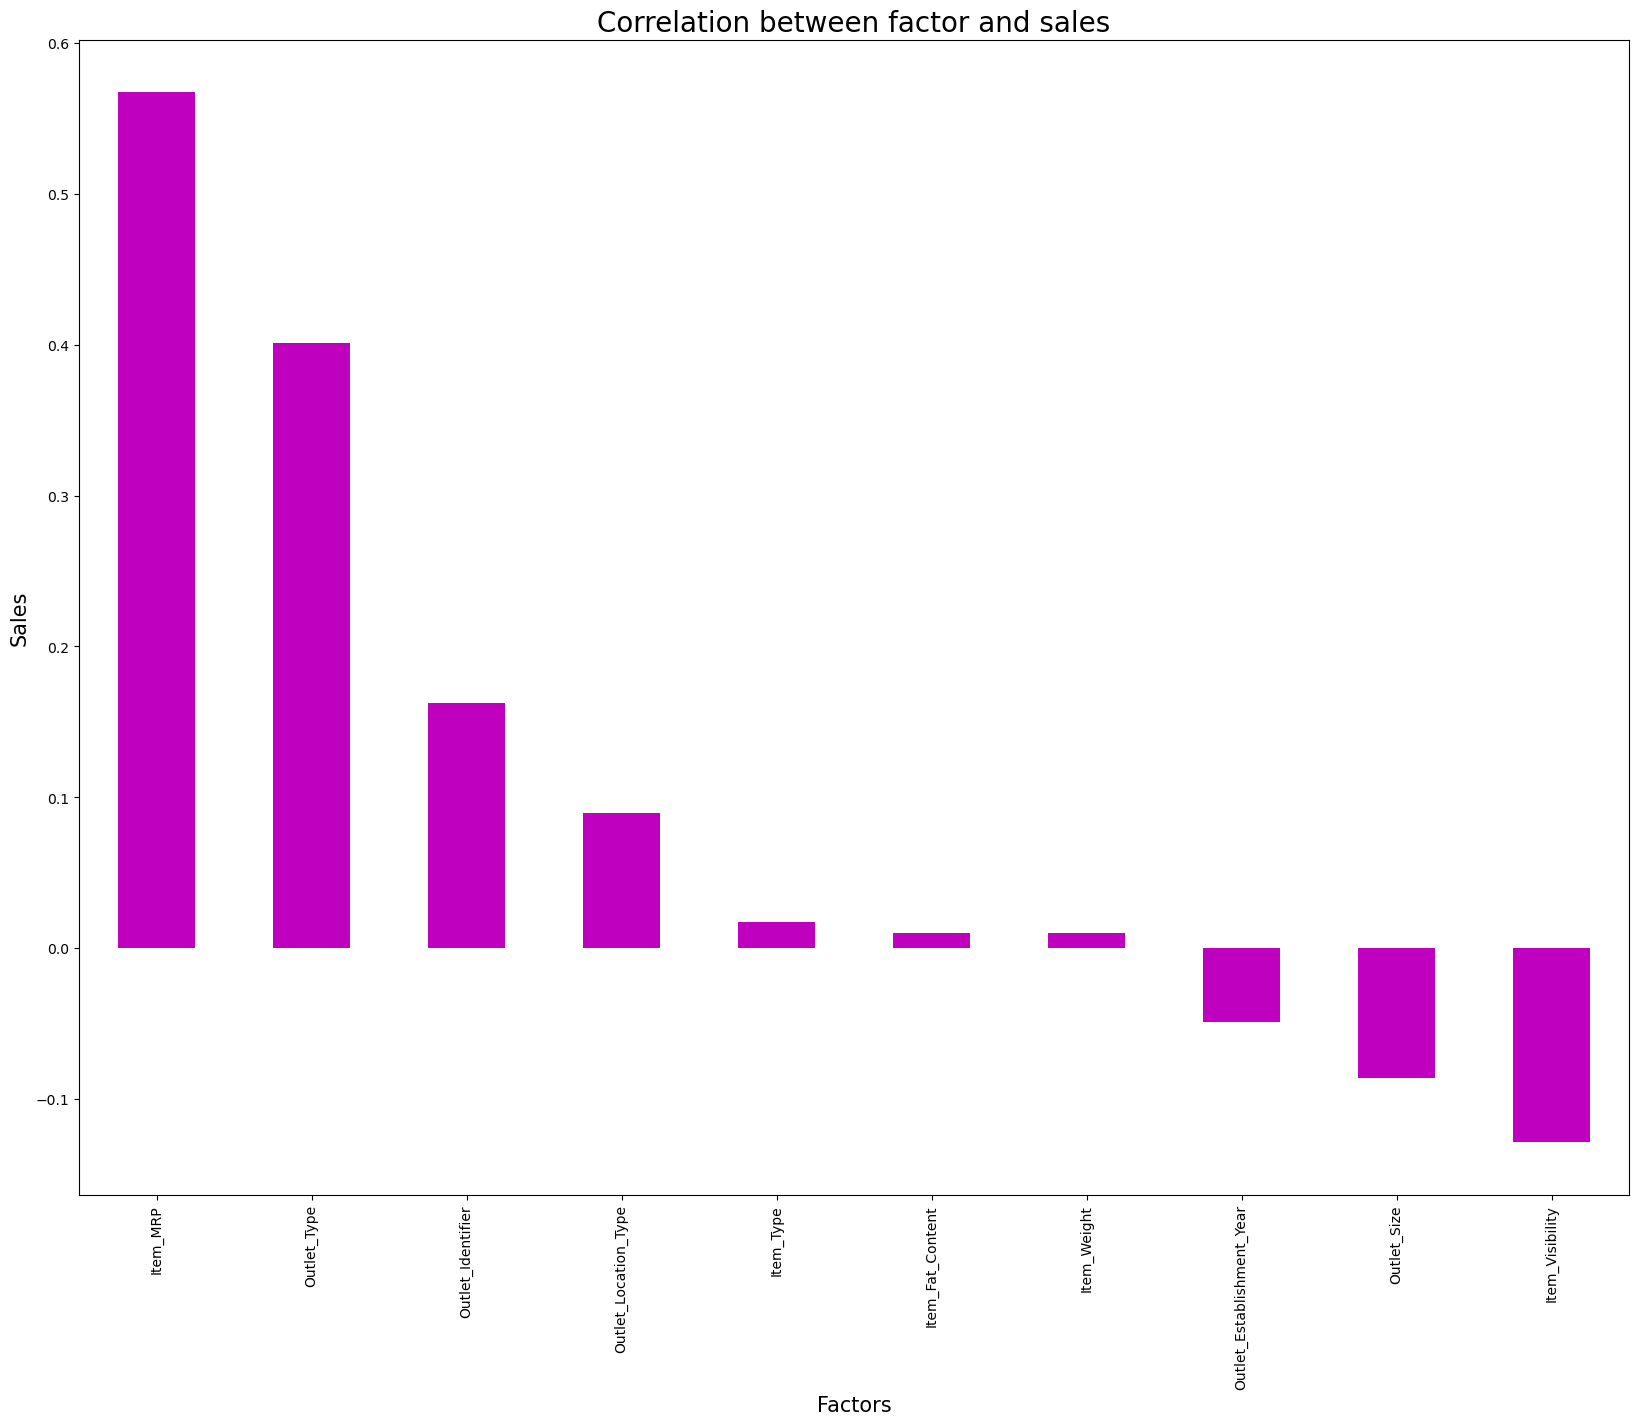

In [46]:
plt.figure(figsize=(20,15))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color="m")
plt.xlabel('Factors',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title("Correlation between factor and sales",fontsize=20)
plt.show()

Observation- "Item_MRP","Outlet_Type","Outlet_Identifier","Outlet_Location_Type" is highly correlated with Item_Outlet_Sales. This give us the clear picture of the factors which are directly related with the Outlet_Item_Sales Moreover Item_Visibility,Outlet_Size are negatively correleated with 'Item_Outlet-Sales'.

Generally PairPlot gives us more clear idea about the correlation 

Seeing the pairplot of the dataset

Item_Weight                     AxesSubplot(0.125,0.712609;0.133621x0.167391)
Item_Fat_Content             AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Item_Visibility               AxesSubplot(0.44569,0.712609;0.133621x0.167391)
Item_Type                    AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Item_MRP                     AxesSubplot(0.766379,0.712609;0.133621x0.167391)
Outlet_Identifier               AxesSubplot(0.125,0.511739;0.133621x0.167391)
Outlet_Establishment_Year    AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Outlet_Size                   AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Outlet_Location_Type         AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Outlet_Type                  AxesSubplot(0.766379,0.511739;0.133621x0.167391)
Item_Outlet_Sales                AxesSubplot(0.125,0.31087;0.133621x0.167391)
dtype: object

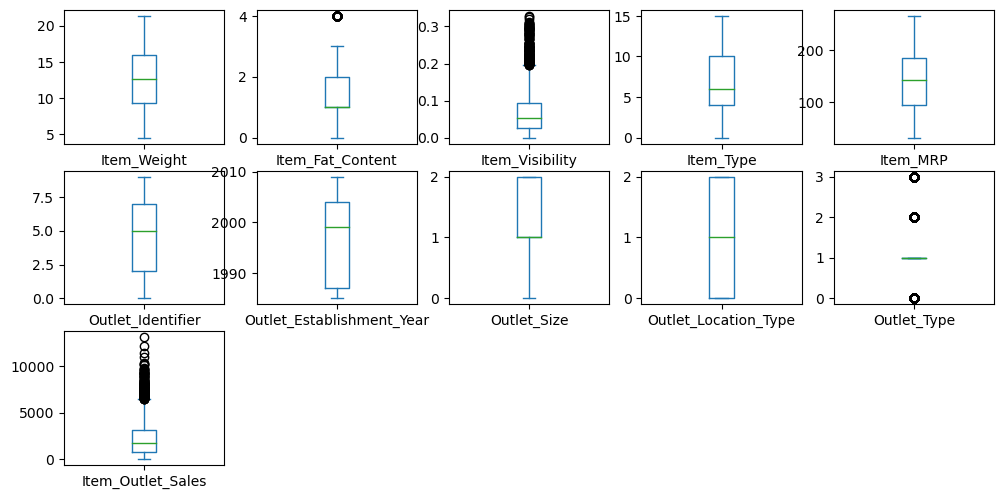

In [47]:
df.plot(kind='box',subplots =True, layout=(4,5),figsize=(12,8))

Observation-As we can see in the box plot there are outliers present in the columns 'Item_Visibility','Item_Fat_Content','Outlet_Type'. So we need to remove this outliers for better results

Removing the outliers from the dataset

In [48]:
from scipy.stats import zscore
out_features=df[['Item_Fat_Content','Item_Visibility','Outlet_Type']]
z=np.abs(zscore(out_features))
z

,Item_Fat_Content,Item_Visibility,Outlet_Type
0,0.572844,0.970732,0.252658
1,0.978092,0.908111,1.002972
2,0.572844,0.956917,0.252658
3,0.978092,1.281758,1.508289
4,0.572844,1.281758,0.252658
...,...,...,...
8518,0.572844,0.181193,0.252658
8519,0.978092,0.371154,0.252658
8520,0.572844,0.599784,0.252658
8521,0.978092,1.532880,1.002972


In [49]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  151,  174,  199,  339,  396,  434,  489,
        502,  521,  532,  615,  727,  753,  838,  854,  891, 1010, 1034,
       1090, 1124, 1133, 1159, 1183, 1209, 1272, 1291, 1311, 1324, 1372,
       1433, 1434, 1496, 1501, 1512, 1542, 1549, 1560, 1575, 1576, 1615,
       1617, 1644, 1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 2062,
       2088, 2111, 2122, 2143, 2168, 2173, 2223, 2251, 2324, 2331, 2438,
       2439, 2445, 2552, 2569, 2586, 2613, 2660, 2678, 2728, 2855, 2895,
       2905, 2971, 2973, 3011, 3017, 3206, 3225, 3241, 3242, 3243, 3335,
       3367, 3399, 3458, 3474, 3480, 3488, 3491, 3497, 3509, 3540, 3545,
       3582, 3602, 3750, 3767, 3884, 3993, 4006, 4019, 4083, 4163, 4219,
       4245, 4290, 4382, 4393, 4408, 4415, 4463, 4530, 4656, 4674, 4680,
       4789, 4865, 4941, 5031, 5047, 5054, 5133, 5146, 5150, 5202, 5287,
       5374, 5401, 5417, 5467, 5539, 5577, 5611, 5633, 5732, 5734, 5784,
       5795, 5837, 5880, 5891, 5946, 6008, 6012, 6

Observation- This are the rows and columns where the threshold is <3 so will will consider values which are >3

In [50]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [51]:
df_new.shape

(8311, 12)

Observation- After removing Outlies from the dataset we can see that the row size has been reduced to 8311 from 8523 we can consider that the difference of the row are the outliers present in the given dataset, Hence the Outliers are removed SUCCESSFULLY

In [52]:
df=df_new
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Now, Checking for skewness from the dataset, as we seen earlier in the description there is less possibilities of skewness in the dataset, still checking it for safer side

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

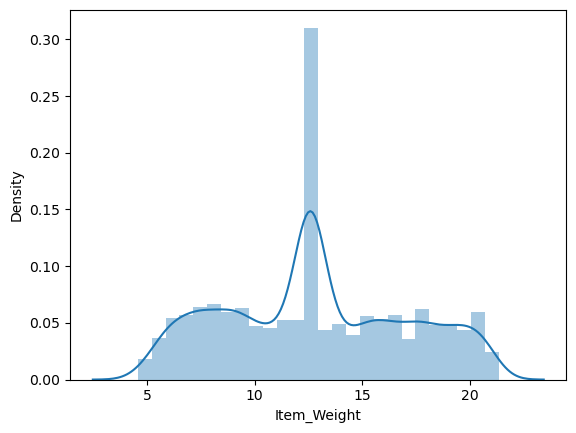

In [53]:
sns.distplot(df['Item_Weight'])

Observation- The Column is not having any skewness

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

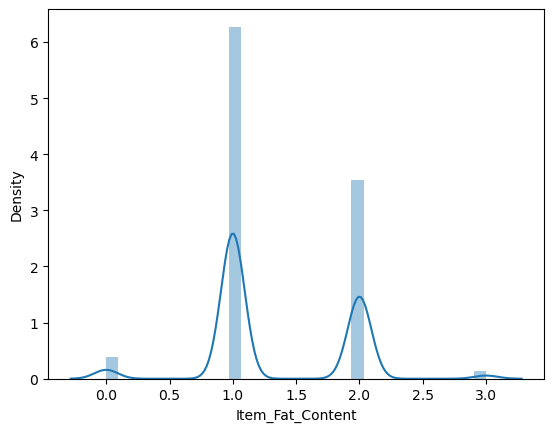

In [54]:
sns.distplot(df['Item_Fat_Content'])

Observation- A little bit skewness, but it can be ignored, it will not impact much on the desired result

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

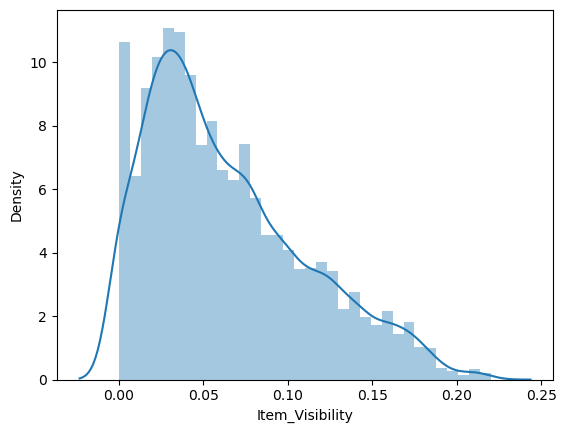

In [55]:
sns.distplot(df['Item_Visibility'])

Observation- A bit of skewness is present in this column

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

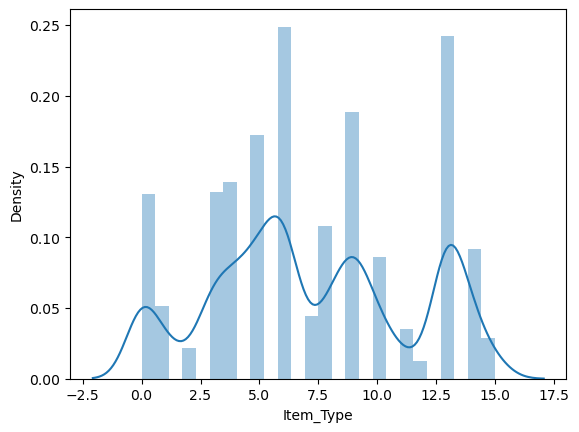

In [56]:
sns.distplot(df['Item_Type'])

Observation- Less skewness, this occures because we used label encoder in this column, this can be ignored, it will not impact much on the desired output

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

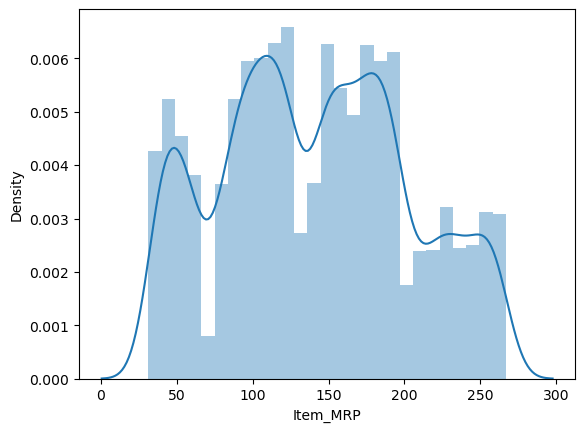

In [57]:
sns.distplot(df['Item_MRP'])

Observation- No skewness present in the given column

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

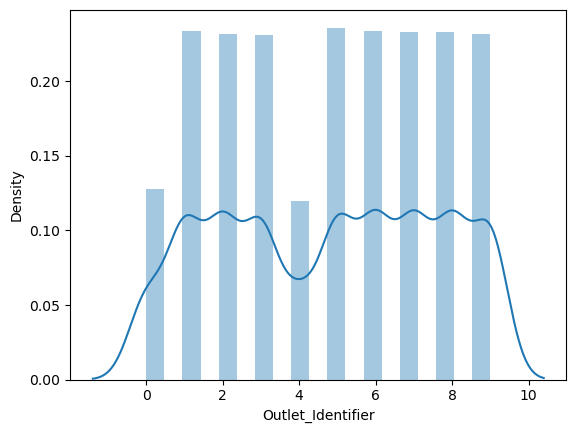

In [58]:
sns.distplot(df['Outlet_Identifier'])

Observation- The graph shows this trend because of LE, but this will not have any impact on the desired result 

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

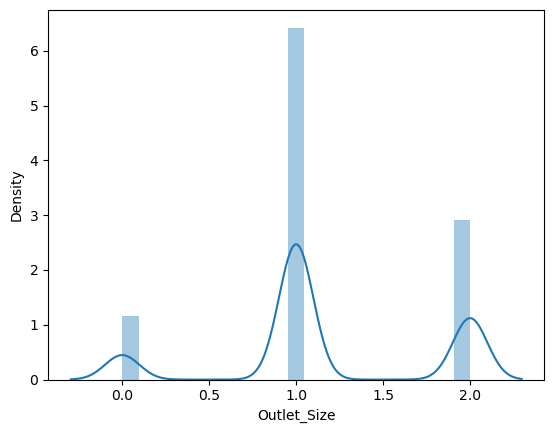

In [59]:
sns.distplot(df['Outlet_Size'])

Observation- No or less skewness present in the column

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

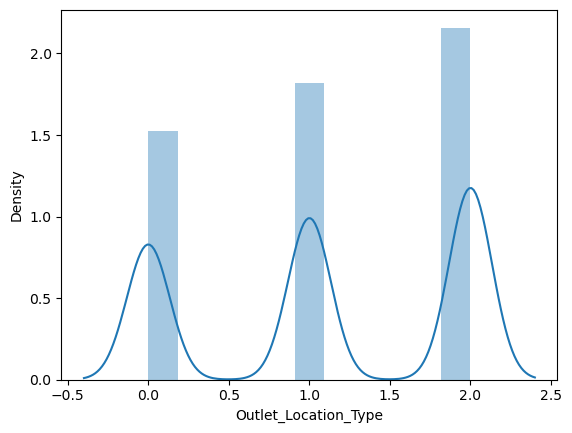

In [60]:
sns.distplot(df['Outlet_Location_Type'])

Observation- No skewness present in the column

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

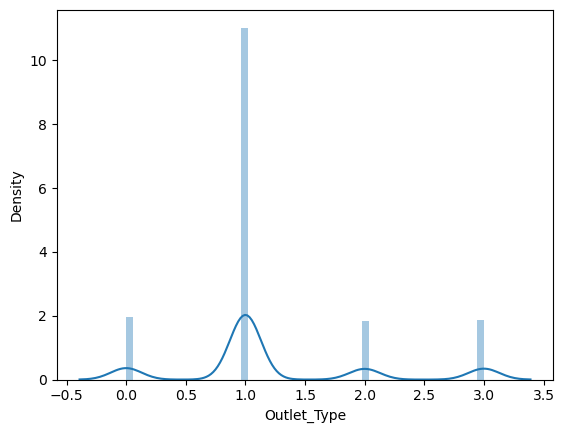

In [61]:
sns.distplot(df['Outlet_Type'])

Observation- No or less skewness present in the given column that will not give any impact on the desired output

In [62]:
df.skew()

Item_Weight                  0.119027
Item_Fat_Content             0.293326
Item_Visibility              0.796022
Item_Type                    0.097112
Item_MRP                     0.129212
Outlet_Identifier           -0.069630
Outlet_Establishment_Year   -0.406564
Outlet_Size                 -0.084214
Outlet_Location_Type        -0.213813
Outlet_Type                  0.946986
Item_Outlet_Sales            1.172835
dtype: float64

Observation- The data is between -0.5 to +0.5 hence we can conclude tat the skewness is not present in the dataset

Again checking the correlation in the given dataset, if the data is negatively correleated then we will remove it otherwise its fine

In [63]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.019550,-0.011493,0.026722,0.024678,-0.009007,0.006776,-0.011180,0.003127,-0.012114,0.007362
Item_Fat_Content,-0.019550,1.000000,0.039971,-0.127919,0.003699,0.000557,-0.011399,-0.008922,-0.003263,0.002202,0.021240
Item_Visibility,-0.011493,0.039971,1.000000,-0.036699,0.000391,-0.070118,-0.041237,0.045655,-0.016388,-0.120234,-0.091207
Item_Type,0.026722,-0.127919,-0.036699,1.000000,0.030344,0.003276,0.007071,0.000959,0.000342,0.001796,0.016185
Item_MRP,0.024678,0.003699,0.000391,0.030344,1.000000,-0.000670,0.006499,0.002977,0.004450,-0.002442,0.572318
Outlet_Identifier,-0.009007,0.000557,-0.070118,0.003276,-0.000670,1.000000,0.078637,0.511740,-0.719827,0.086704,0.151866
Outlet_Establishment_Year,0.006776,-0.011399,-0.041237,0.007071,0.006499,0.078637,1.000000,0.209789,-0.105827,-0.142443,-0.060931
Outlet_Size,-0.011180,-0.008922,0.045655,0.000959,0.002977,0.511740,0.209789,1.000000,-0.610792,-0.194837,-0.081440
Outlet_Location_Type,0.003127,-0.003263,-0.016388,0.000342,0.004450,-0.719827,-0.105827,-0.610792,1.000000,0.473953,0.090400
Outlet_Type,-0.012114,0.002202,-0.120234,0.001796,-0.002442,0.086704,-0.142443,-0.194837,0.473953,1.000000,0.392242


Spliting the data into training and testing (x&y)

It is necessary to split data in training and testing model 70% of the data will go under training and 30 % of the data will go in testing It will give us the accuracy of the model ad out of too many model we will choose the best one.

In [64]:
x=df.drop("Item_Outlet_Sales", axis=1)
y=df["Item_Outlet_Sales"]

In [65]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


Observation- The target variable y is been removed from the columns hence the column size is reduced from 12 to 11

In [66]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8311, dtype: float64

Splited the data in x & y SUCCESSFULLY

In [67]:
x=x.drop(columns=['Item_Identifier'])

In [68]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [69]:
x=x.drop(columns=['Outlet_Establishment_Year'])

In [70]:
x=x.drop(columns=['Outlet_Identifier'])

In [71]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1,0,1
1,5.920,2,0.019278,14,48.2692,1,2,2
2,17.500,1,0.016760,10,141.6180,1,0,1
3,19.200,2,0.000000,6,182.0950,1,2,0
4,8.930,1,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1
8519,8.380,2,0.046982,0,108.1570,1,1,1
8520,10.600,1,0.035186,8,85.1224,2,1,1
8521,7.210,2,0.145221,13,103.1332,1,2,2


Observation- We have dropped unwated columns which are not that important for the analysis rest we have considered the crusial parts which plays vital role for better accuracy of the model

In [72]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8311, dtype: float64

Now, we will do feature scaling using Standard Scalarization

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.830214,-0.584872,-1.010559,-0.769722,1.746633,-0.278412,-1.377747,-0.27256
1,-1.627842,1.176314,-0.942286,1.610970,-1.490381,-0.278412,1.091887,0.99012
2,1.104858,-0.584872,-0.995497,0.658694,0.008931,-0.278412,-1.377747,-0.27256
3,1.506031,1.176314,-1.349659,-0.293583,0.659049,-0.278412,1.091887,-1.53524
4,-0.917529,-0.584872,-1.349659,0.420624,-1.400563,-1.944271,1.091887,-0.27256
...,...,...,...,...,...,...,...,...
8306,-1.404836,-0.584872,-0.149753,1.372901,1.179868,-1.944271,1.091887,-0.27256
8307,-1.047320,1.176314,-0.356860,-1.721999,-0.528499,-0.278412,-0.142930,-0.27256
8308,-0.523435,-0.584872,-0.606128,0.182555,-0.898467,1.387448,-0.142930,-0.27256
8309,-1.323422,1.176314,1.719040,1.372901,-0.609189,-0.278412,1.091887,0.99012


Why we have done Standard Scalarization ?

The Standard Scaler is a popular method for standardizing features. It transforms the data such that it has a mean of 0 and a standard deviation of 1. The formula for standardization is (x - mean) / standard deviation for each feature.

Now, the data is in the form where we have a mean of 0 and Standard Deviation of 1 hence checking the Variance Inflation Factor(VIF)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif values"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif["features"]=x.columns
vif

,vif values,features
0,1.002034,Item_Weight
1,1.018631,Item_Fat_Content
2,1.023934,Item_Visibility
3,1.019214,Item_Type
4,1.001670,Item_MRP
5,1.632321,Outlet_Size
6,2.028429,Outlet_Location_Type
7,1.338955,Outlet_Type


Observation- a VIF value greater than 10 is considered a cause for concern, indicating potentially problematic multicollinearity. However, there is no strict threshold, and the interpretation of VIF values depends on the context of the analysis and the specific requirements of the model. If multicollinearity is detected, it may be necessary to address it by removing correlated variables, combining them, or using regularization techniques.

We dont have any multicollinearity in the dataset as none the vale is <10. Hence we will not drop any column and we are good to go

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [76]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is ",maxAccu, "on Random_state",maxRS)

maximum r2 score is  0.5307190664939159 on Random_state 46


In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=maxRS)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

# Linear Regression Model

In [79]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_LR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_LR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.5329873226814885
R2_score on training data: 49.275450051234735
Mean Absolute Error :- 871.0369245873698
Mean_Squared_Error :-  1357288.0892089896
Root Mean Square Error:- 1165.027076599076


Linear Regression Model Accuracy :-53.29%

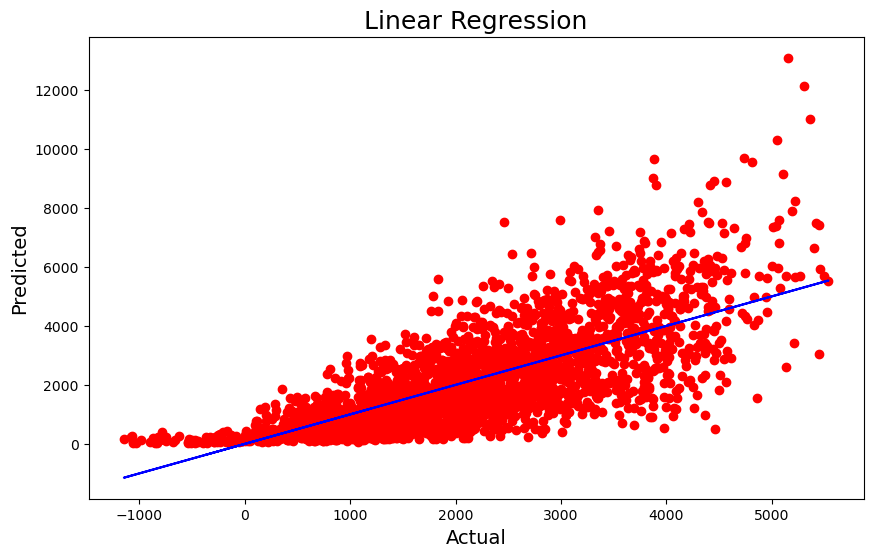

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Observation- We can notice that the data is well spreaded accross the Linear regression line. The accuracy is not that good because of this spread. This spread comes after lot of filteration and EDA process, the nature of data is not supporting the model properly to do a add on we will add a booster (Gradient Booster) and see the score of the model

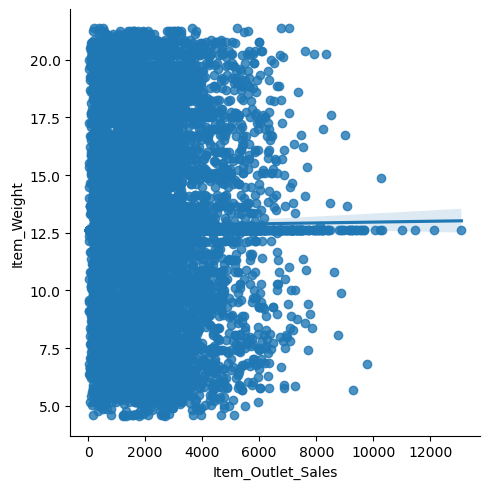

In [88]:
sns.lmplot(x='Item_Outlet_Sales', y= 'Item_Weight' , data=df,)

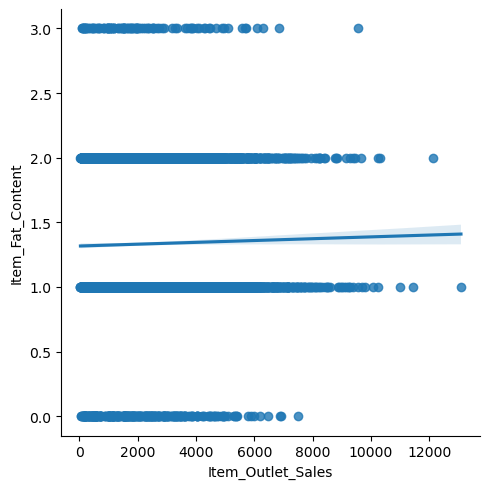

In [89]:
sns.lmplot(x='Item_Outlet_Sales', y= 'Item_Fat_Content' , data=df,)

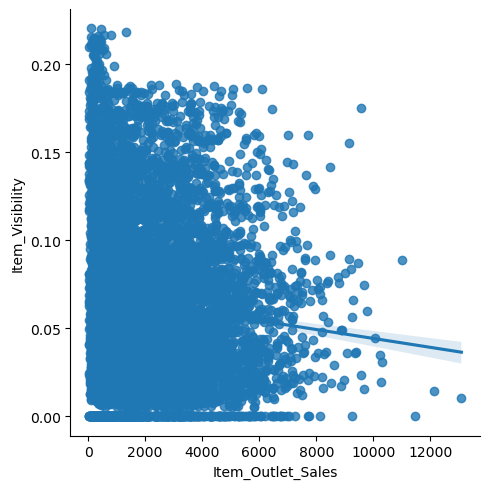

In [90]:
sns.lmplot(x='Item_Outlet_Sales', y= 'Item_Visibility' , data=df,)

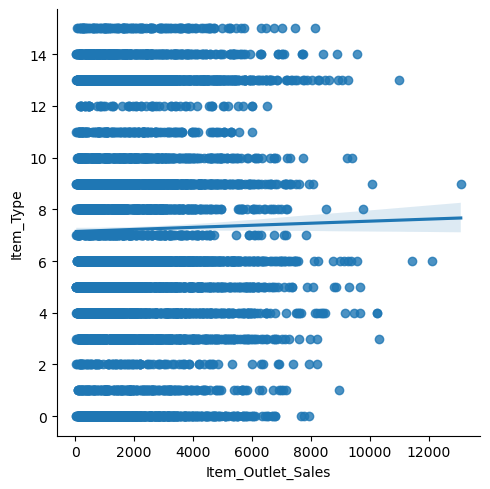

In [91]:
sns.lmplot(x='Item_Outlet_Sales', y= 'Item_Type' , data=df,)

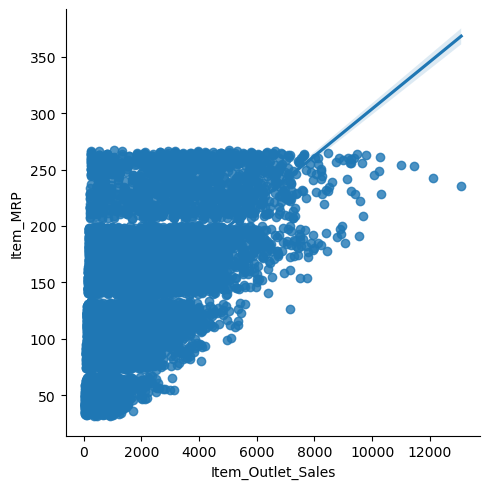

In [92]:
sns.lmplot(x='Item_Outlet_Sales', y= 'Item_MRP' , data=df,)

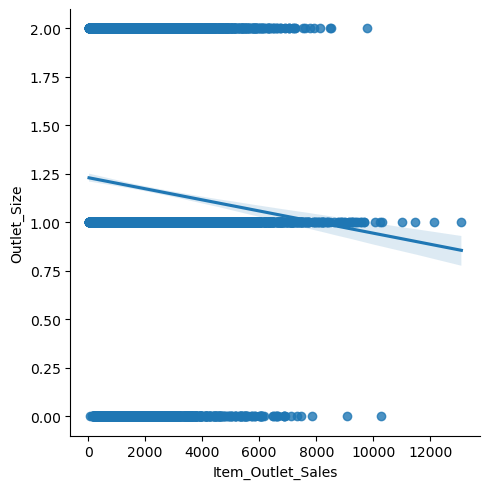

In [93]:
sns.lmplot(x='Item_Outlet_Sales', y= 'Outlet_Size' , data=df,)

In [81]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_RFR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_RFR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.5710111274189607
R2_score on training data: 93.55945665307561
Mean Absolute Error :- 781.016313585405
Mean_Squared_Error :-  1246778.7609121464
Root Mean Square Error:- 1116.5924775459248


Observation- The accuracy is 56.95% which is less than the LR model. Hence we will see more on it

In [82]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_GBR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_GBR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.6124801331837963
R2_score on training data: 62.303604577466984
Mean Absolute Error :- 746.4354036123893
Mean_Squared_Error :-  1126256.577404989
Root Mean Square Error:- 1061.252362732347


Observation- The accuracuy of the model is increased by 6-7% and its a decent percentage to move forward with. Total Accuracy is 61.24%

In [83]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:', r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_lasso))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_lasso))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.5330357372944621
R2_score on training data: 49.27497296960187
Mean Absolute Error :- 870.8512195229988
Mean_Squared_Error :-  1357147.380871242
Root Mean Square Error:- 1164.9666865929007


Observation- The accuracy is 53.30%

In [84]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:', r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_rd))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_rd))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.5329857057737697
R2_score on training data: 49.275447203548005
Mean Absolute Error :- 871.0216997522566
Mean_Squared_Error :-  1357292.7884595557
Root Mean Square Error:- 1165.029093396193


Observation- The accuracy is 53.29%

In [85]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_dtr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_dtr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.21262266862984325
R2_score on training data: 100.0
Mean Absolute Error :- 1068.544395509222
Mean_Squared_Error :-  2288370.156712045
Root Mean Square Error:- 1512.7359838094833


The accuracy of DTR is very poor i.e 20.29%

In [86]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_svr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_svr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.04645008319597754
R2_score on training data: 4.501986971059568
Mean Absolute Error :- 1217.984002311242
Mean_Squared_Error :-  2771320.7957770824
Root Mean Square Error:- 1664.728445055554


The accuracy is far more poorer than any other model 4.64%

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_etr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_etr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.5379934543256942
R2_score on training data: 99.99998134352832
Mean Absolute Error :- 800.2429971339214
Mean_Squared_Error :-  1342738.670780551
Root Mean Square Error:- 1158.7660120924115


Observation- The accuracy of this model is also not that good its 53.63%

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_LR)- score.mean())*100)

[0.52116792 0.50213353 0.48911586 0.5021446  0.50114834]
0.5031420505802714
Difference between R2 score and cross validation is :-  2.9845272101217124


In [96]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_RFR)- score.mean())*100)

[0.55758648 0.52293126 0.51781207 0.53996638 0.55922732]
0.5395047008841475
Difference between R2 score and cross validation is :-  6.786907683868925


In [97]:
score2=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_svr)- score.mean())*100)

[0.04694158 0.07097335 0.04799343 0.06307495 0.06341343]
0.05847935061174583
Difference between R2 score and cross validation is :-  -45.669196738429385


In [98]:
score3=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_etr)- score.mean())*100)

[0.54190951 0.49515802 0.4738075  0.52004223 0.52990941]
0.5121653340722448
Difference between R2 score and cross validation is :-  3.4851403745422838


In [99]:
score4=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_dtr)- score.mean())*100)

[0.21635677 0.14786324 0.17167844 0.13460932 0.20711475]
0.17552450387753127
Difference between R2 score and cross validation is :-  -29.051938195042815


In [100]:
score5=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_GBR)- score.mean())*100)

[0.60344117 0.57679235 0.57029338 0.59544359 0.5969232 ]
0.5885787376226779
Difference between R2 score and cross validation is :-  10.933808260352496


Saving the Model

In [101]:
df=pd.DataFrame(pred)
df.to_csv('BigMart_Mini_Project.csv')